# Analysis for Manual Subtitles

In [1]:
#importing a file and converting it into a dataframe
import webvtt
import pandas as pd
import string
import matplotlib.pyplot as plt


# Load the VTT file into a DataFrame
data = []

for caption in webvtt.read('manual_sub/Lecture1SetsSetOperationsandMathematicalInduction_manual.en-j3PyPqV-e1s.vtt'):
    data.append({
        'start': caption.start,
        'end': caption.end,
        'text': caption.text.strip()
    })

manual_df = pd.DataFrame(data)

In [2]:
#converting datetime into seconds for easier calculations
from datetime import datetime
def time_to_seconds(time_str):
    fmt = '%H:%M:%S.%f'
    time_obj = datetime.strptime(time_str, fmt)
    return time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second + time_obj.microsecond / 1_000_000

manual_df['start_seconds'] = manual_df['start'].apply(time_to_seconds)
manual_df['end_seconds'] = manual_df['end'].apply(time_to_seconds)

# Calculate duration of each caption
manual_df['duration'] = manual_df['end_seconds'] - manual_df['start_seconds']

In [3]:
manual_df

,start,end,text,start_seconds,end_seconds,duration
0,00:00:00.000,00:00:12.820,[SQUEAKING]\n[RUSTLING] [CLICKING],0.000,12.820,12.820
1,00:00:12.820,00:00:15.180,CASEY RODRIGUEZ: OK.,12.820,15.180,2.360
2,00:00:15.180,00:00:19.940,"So I have to admit this\nis extremely awkward,",15.180,19.940,4.760
3,00:00:19.940,00:00:21.998,lecturing to an empty room.,19.940,21.998,2.058
4,00:00:21.998,00:00:23.540,So I have to imagine\nthere's somebody,21.998,23.540,1.542
...,...,...,...,...,...,...
844,01:13:12.550,01:13:19.650,This is bigger than or\nequal to 1 m plus 1 ti...,4392.550,4399.650,7.100
845,01:13:22.250,01:13:30.300,"Thus, 1 plus c to the m plus\n1 is greater tha...",4402.250,4410.300,8.050
846,01:13:30.300,01:13:32.690,which is the n\nequals n plus 1 case.,4410.300,4412.690,2.390
847,01:13:46.540,01:13:58.440,"So by induction, this inequality\ntriple star ...",4426.540,4438.440,11.900


In [4]:
total_caption_time = manual_df['duration'].sum()
total_video_time = manual_df['end_seconds'].max()
caption_ratio = total_caption_time / total_video_time

print(f'Total Caption Time: {total_caption_time} seconds')
print(f'Total Video Time: {total_video_time} seconds')
print(f'Percentage of video with captions: {caption_ratio * 100:.2f}%')

Total Caption Time: 3833.6270000000004 seconds
Total Video Time: 4455.39 seconds
Percentage of video with captions: 86.04%


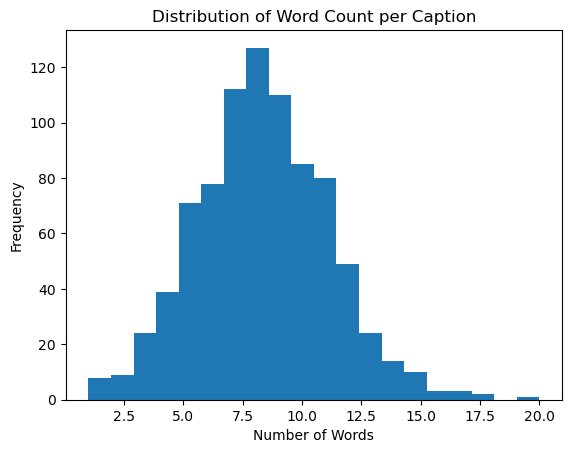

In [5]:
manual_df['word_count'] = manual_df['text'].apply(lambda x: len(x.split()))
plt.hist(manual_df['word_count'], bins=20)
plt.title('Distribution of Word Count per Caption')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

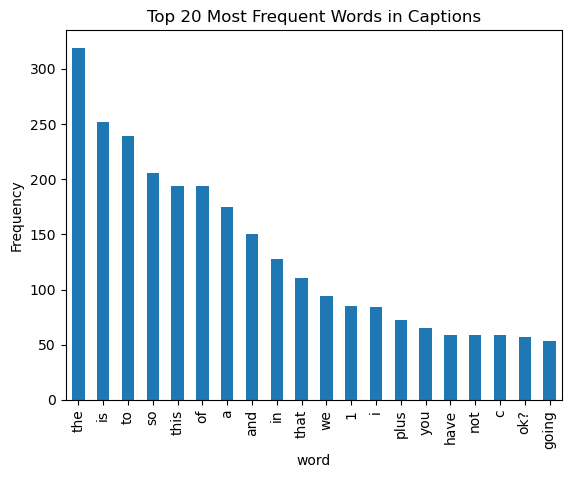

In [6]:
from collections import Counter

all_text = ' '.join(manual_df['text']).lower().split()
word_freq = Counter(all_text)

# Plot top 20 most frequent words
common_words = pd.DataFrame(word_freq.most_common(20), columns=['word', 'count'])
common_words.plot(kind='bar', x='word', y='count', legend=False)
plt.title('Top 20 Most Frequent Words in Captions')
plt.ylabel('Frequency')
plt.show()

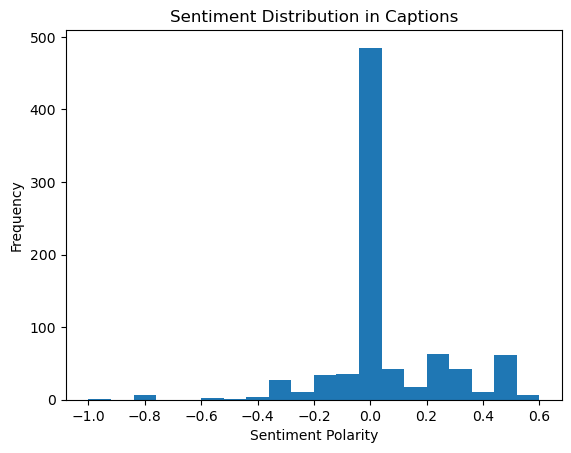

In [7]:
from textblob import TextBlob

manual_df['sentiment'] = manual_df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.hist(manual_df['sentiment'], bins=20)
plt.title('Sentiment Distribution in Captions')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

In [8]:
manual_df.head(10)

,start,end,text,start_seconds,end_seconds,duration,word_count,sentiment
0,00:00:00.000,00:00:12.820,[SQUEAKING]\n[RUSTLING] [CLICKING],0.000,12.820,12.820,3,0.0000
1,00:00:12.820,00:00:15.180,CASEY RODRIGUEZ: OK.,12.820,15.180,2.360,3,0.5000
2,00:00:15.180,00:00:19.940,"So I have to admit this\nis extremely awkward,",15.180,19.940,4.760,9,-0.6000
3,00:00:19.940,00:00:21.998,lecturing to an empty room.,19.940,21.998,2.058,5,-0.1000
4,00:00:21.998,00:00:23.540,So I have to imagine\nthere's somebody,21.998,23.540,1.542,7,0.0000
5,00:00:23.540,00:00:26.150,on the other end actually\nlistening to me at ...,23.540,26.150,2.610,11,-0.0625
6,00:00:29.170,00:00:32.380,Perhaps this is what YouTube\nstars have to go...,29.170,32.380,3.210,10,0.0000
7,00:00:32.380,00:00:33.630,at some point in their career.,32.380,33.630,1.250,6,0.0000
8,00:00:36.280,00:00:38.510,So what is the purpose\nof this course?,36.280,38.510,2.230,8,0.0000
9,00:00:38.510,00:00:51.770,"So this is for 18\n100A, Real Analysis.",38.510,51.770,13.260,8,0.2000


Total word count of the file:  6998


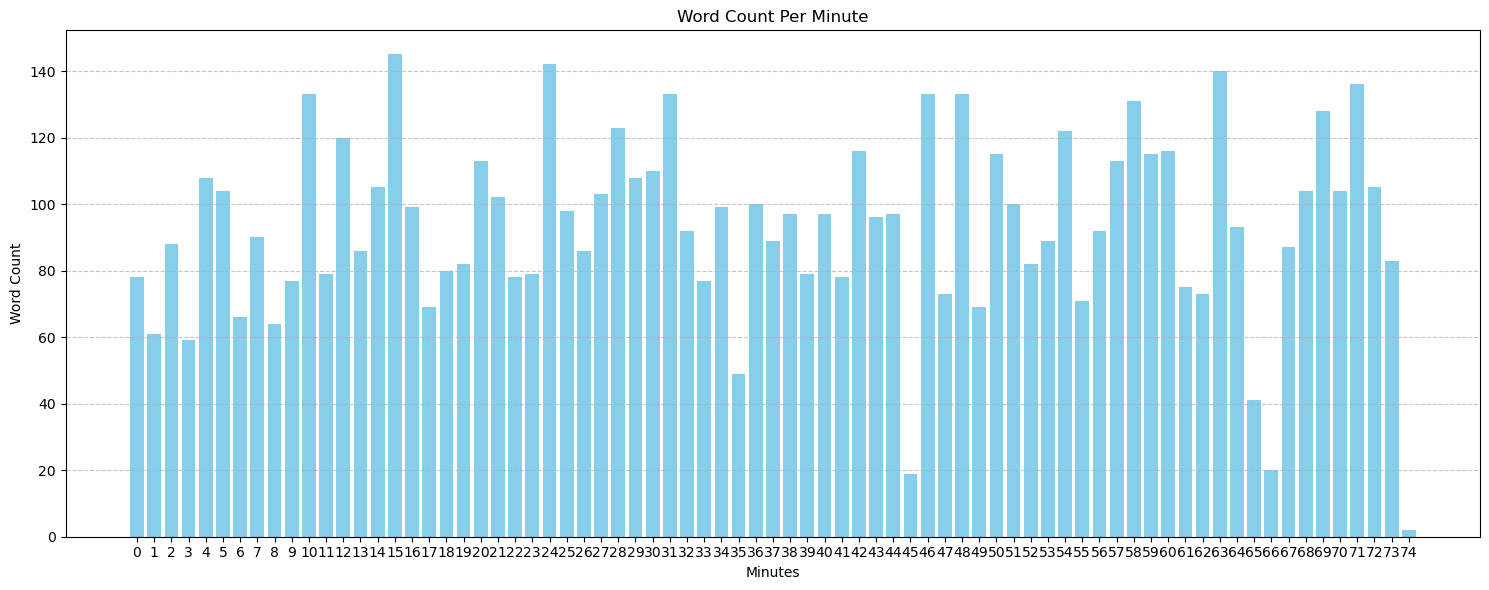

In [9]:
import webvtt
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

def calculate_word_count(vtt_file):
    total_word_count = 0
        for caption in webvtt.read(vtt_file):
        word_count = len(caption.text.strip().split())
        total_word_count += word_count
    
    return total_word_count

def time_to_seconds(timestamp):
    time_obj = datetime.strptime(timestamp, '%H:%M:%S.%f')
    return time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second + time_obj.microsecond / 1_000_000

# Function to calculate word count per minute
def calculate_word_count_per_minute(vtt_file):
    captions_data = []
    
    for caption in webvtt.read(vtt_file):
        start_seconds = time_to_seconds(caption.start)
        word_count = len(caption.text.strip().split())
        captions_data.append((start_seconds, word_count))
    
    words_per_minute = {}
    
    # Calculate word count for each minute
    for start_time, word_count in captions_data:
        minute = int(start_time // 60)  # Convert seconds to minute index
        if minute not in words_per_minute:
            words_per_minute[minute] = 0
        words_per_minute[minute] += word_count
    
    return words_per_minute

# plot histogram for word count per minute
def plot_word_count_histogram(words_per_minute):
    minutes = sorted(words_per_minute.keys())
    word_counts = [words_per_minute[minute] for minute in minutes]

    plt.figure(figsize=(15, 6))
    plt.bar(minutes, word_counts, color='skyblue')
    plt.xlabel('Minutes')
    plt.ylabel('Word Count')
    plt.title('Word Count Per Minute')
    plt.xticks(np.arange(min(minutes), max(minutes) + 1, 1))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

vtt_file = 'manual_sub/Lecture1SetsSetOperationsandMathematicalInduction_manual.en-j3PyPqV-e1s.vtt'
words_per_minute = calculate_word_count_per_minute(vtt_file)
total_words = calculate_word_count(vtt_file)
print("Total word count of the file: ",total_words)
plot_word_count_histogram(words_per_minute)


In [10]:
manual_df['text'] = manual_df['text'].str.replace('\n', ' ', regex=False)
manual_df['text'] = manual_df['text'].str.replace(r'\[.*?\]|\(.*?\)', '', regex=True)
manual_df['text'] = manual_df['text'].str.translate(str.maketrans('', '', string.punctuation))
manual_df['text'] = manual_df['text'].str.lower()

In [11]:
manual_df['Tokens'] = manual_df['text'].str.split()

In [12]:
manual_df.head()

,start,end,text,start_seconds,end_seconds,duration,word_count,sentiment,Tokens
0,00:00:00.000,00:00:12.820,,0.000,12.820,12.820,3,0.0,[]
1,00:00:12.820,00:00:15.180,casey rodriguez ok,12.820,15.180,2.360,3,0.5,"[casey, rodriguez, ok]"
2,00:00:15.180,00:00:19.940,so i have to admit this is extremely awkward,15.180,19.940,4.760,9,-0.6,"[so, i, have, to, admit, this, is, extremely, ..."
3,00:00:19.940,00:00:21.998,lecturing to an empty room,19.940,21.998,2.058,5,-0.1,"[lecturing, to, an, empty, room]"
4,00:00:21.998,00:00:23.540,so i have to imagine theres somebody,21.998,23.540,1.542,7,0.0,"[so, i, have, to, imagine, theres, somebody]"


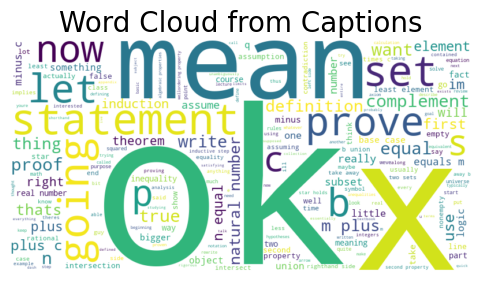

In [13]:
from wordcloud import WordCloud
text = ' '.join(manual_df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(7, 3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud from Captions', fontsize=20)
plt.show()

# Analysis for Whisper Subtitles

In [14]:
data = []

for caption in webvtt.read('whisper_sub/Lecture1SetsSetOperationsandMathematicalInduction.vtt'):
    data.append({
        'start': caption.start,
        'end': caption.end,
        'text': caption.text.strip()
    })

whisper_df = pd.DataFrame(data)

In [15]:
from datetime import datetime
def time_to_seconds(time_str):
    fmt = '%H:%M:%S.%f'
    time_obj = datetime.strptime(time_str, fmt)
    return time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second + time_obj.microsecond / 1_000_000

whisper_df['start_seconds'] = whisper_df['start'].apply(time_to_seconds)
whisper_df['end_seconds'] = whisper_df['end'].apply(time_to_seconds)
whisper_df['duration'] = whisper_df['end_seconds'] - whisper_df['start_seconds']

In [17]:
total_caption_time = whisper_df['duration'].sum()
total_video_time = whisper_df['end_seconds'].max()
caption_ratio = total_caption_time / total_video_time

print(f'Total Caption Time: {total_caption_time} seconds')
print(f'Total Video Time: {total_video_time} seconds')
print(f'Percentage of video with captions: {caption_ratio * 100:.2f}%')

Total Caption Time: 3687.8399999999974 seconds
Total Video Time: 4453.98 seconds
Percentage of video with captions: 82.80%


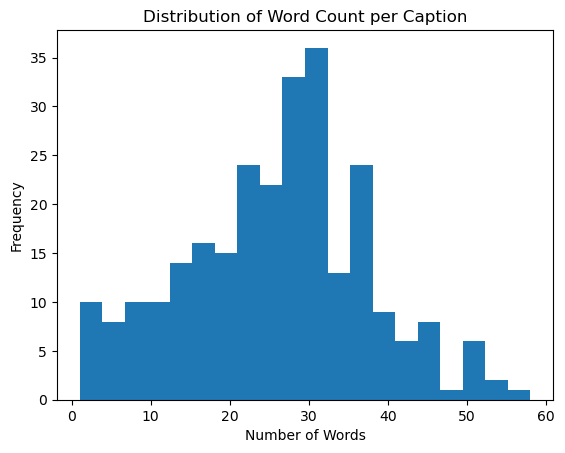

In [18]:
whisper_df['word_count'] = whisper_df['text'].apply(lambda x: len(x.split()))
plt.hist(whisper_df['word_count'], bins=20)
plt.title('Distribution of Word Count per Caption')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

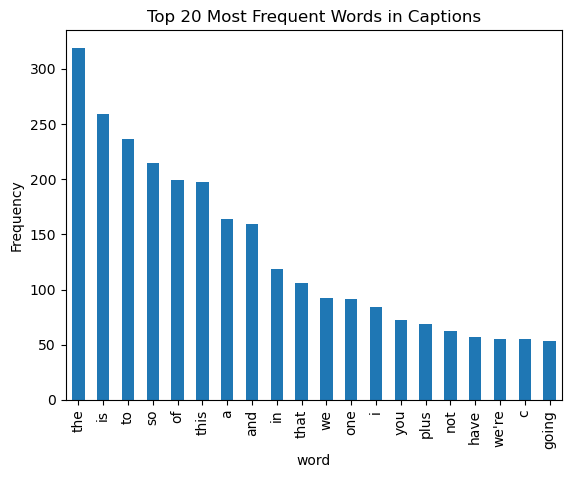

In [19]:
from collections import Counter

all_text = ' '.join(whisper_df['text']).lower().split()
word_freq = Counter(all_text)

# Plot top 20 most frequent words
common_words = pd.DataFrame(word_freq.most_common(20), columns=['word', 'count'])
common_words.plot(kind='bar', x='word', y='count', legend=False)
plt.title('Top 20 Most Frequent Words in Captions')
plt.ylabel('Frequency')
plt.show()

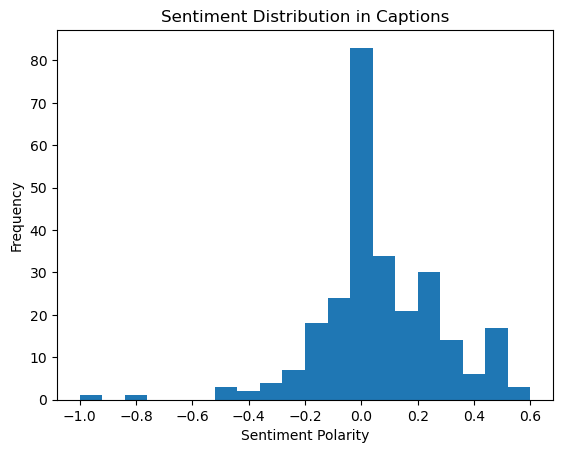

In [20]:
from textblob import TextBlob

whisper_df['sentiment'] = whisper_df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.hist(whisper_df['sentiment'], bins=20)
plt.title('Sentiment Distribution in Captions')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

In [21]:
whisper_df.head(10)

,start,end,text,start_seconds,end_seconds,duration,word_count,sentiment
0,00:00:12.540,00:00:22.440,Okay. So I have to admit this is extremely awk...,12.54,22.44,9.90,18,-0.066667
1,00:00:22.440,00:00:25.920,to imagine there's somebody on the other end a...,22.44,25.92,3.48,15,-0.062500
2,00:00:28.660,00:00:37.060,Perhaps this is what YouTube stars have to go ...,28.66,37.06,8.40,19,0.000000
3,00:00:37.060,00:00:54.720,the purpose of this course? So this is for 180...,37.06,54.72,17.66,20,0.200000
4,00:01:02.600,00:01:23.100,The really I think the first primary purpose o...,62.60,83.10,20.50,23,0.337500
5,00:01:23.100,00:01:38.540,"read a proof, being able to write a proof. And...",83.10,98.54,15.44,29,0.337500
6,00:01:38.540,00:01:58.220,"prove statements about real numbers, functions...",98.54,118.22,19.68,8,0.200000
7,00:02:06.800,00:02:28.200,"Okay. So the second part, this is the analysis...",126.80,148.20,21.40,27,0.210000
8,00:02:28.200,00:02:48.240,"kind of review. And for most of you, a lot of ...",148.20,168.24,20.04,43,0.256250
9,00:02:48.240,00:03:10.100,So the first set of objects we're going to def...,168.24,190.10,21.86,28,0.250000


Total word count of the file:  6906


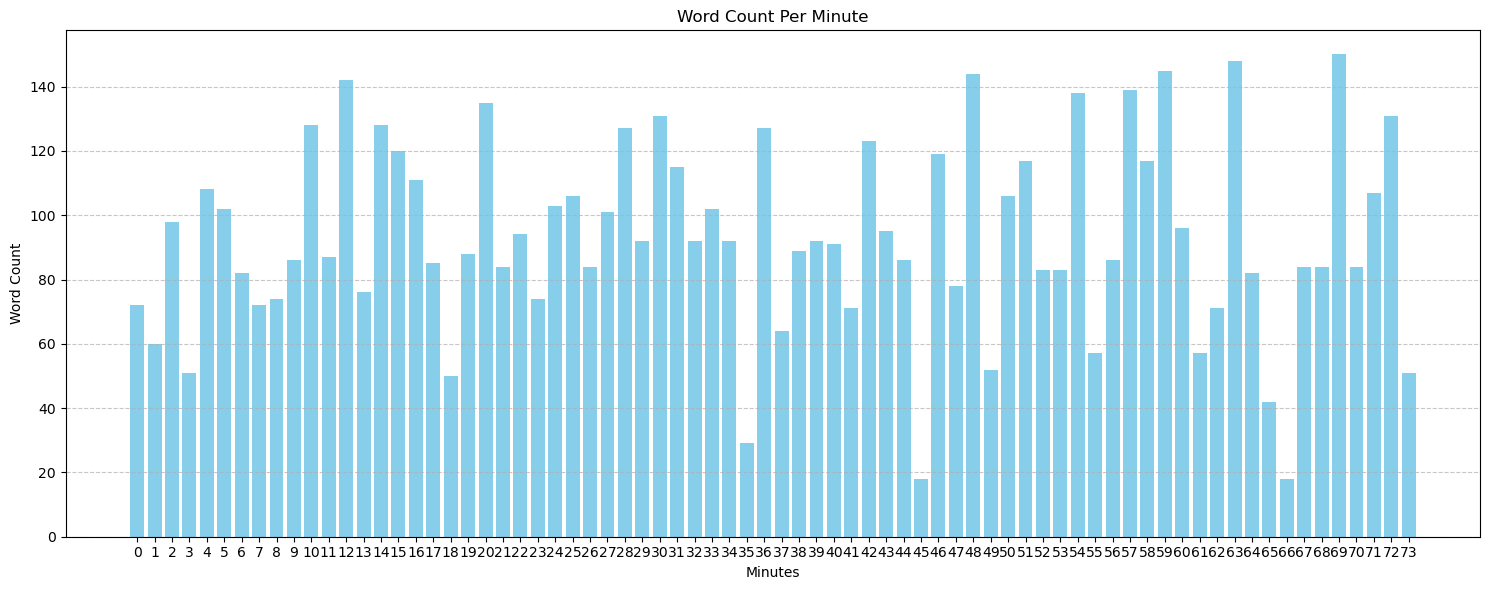

In [22]:
import webvtt
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

def calculate_word_count(vtt_file):
    total_word_count = 0
    
    for caption in webvtt.read(vtt_file):
        word_count = len(caption.text.strip().split())
        total_word_count += word_count
    
    return total_word_count

def time_to_seconds(timestamp):
    time_obj = datetime.strptime(timestamp, '%H:%M:%S.%f')
    return time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second + time_obj.microsecond / 1_000_000

def calculate_word_count_per_minute(vtt_file):
    captions_data = []
    
    for caption in webvtt.read(vtt_file):
        start_seconds = time_to_seconds(caption.start)
        word_count = len(caption.text.strip().split())
        captions_data.append((start_seconds, word_count))
    
    words_per_minute = {}
    
    for start_time, word_count in captions_data:
        minute = int(start_time // 60) 
        if minute not in words_per_minute:
            words_per_minute[minute] = 0
        words_per_minute[minute] += word_count
    
    return words_per_minute

# Function to plot histogram for word count per minute
def plot_word_count_histogram(words_per_minute):
    minutes = sorted(words_per_minute.keys())
    word_counts = [words_per_minute[minute] for minute in minutes]

    plt.figure(figsize=(15, 6))
    plt.bar(minutes, word_counts, color='skyblue')
    plt.xlabel('Minutes')
    plt.ylabel('Word Count')
    plt.title('Word Count Per Minute')
    plt.xticks(np.arange(min(minutes), max(minutes) + 1, 1))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

vtt_file = 'whisper_sub/Lecture1SetsSetOperationsandMathematicalInduction.vtt'
words_per_minute = calculate_word_count_per_minute(vtt_file)
total_words = calculate_word_count(vtt_file)
print("Total word count of the file: ",total_words)
plot_word_count_histogram(words_per_minute)


In [23]:
whisper_df['text'] = whisper_df['text'].str.replace('\n', ' ', regex=False)
whisper_df['text'] = whisper_df['text'].str.replace(r'\[.*?\]|\(.*?\)', '', regex=True)
whisper_df['text'] = whisper_df['text'].str.translate(str.maketrans('', '', string.punctuation))
whisper_df['text'] = whisper_df['text'].str.lower()

In [24]:
whisper_df['Tokens'] = whisper_df['text'].str.split()

In [25]:
whisper_df.head()

,start,end,text,start_seconds,end_seconds,duration,word_count,sentiment,Tokens
0,00:00:12.540,00:00:22.440,okay so i have to admit this is extremely awkw...,12.54,22.44,9.90,18,-0.066667,"[okay, so, i, have, to, admit, this, is, extre..."
1,00:00:22.440,00:00:25.920,to imagine theres somebody on the other end ac...,22.44,25.92,3.48,15,-0.062500,"[to, imagine, theres, somebody, on, the, other..."
2,00:00:28.660,00:00:37.060,perhaps this is what youtube stars have to go ...,28.66,37.06,8.40,19,0.000000,"[perhaps, this, is, what, youtube, stars, have..."
3,00:00:37.060,00:00:54.720,the purpose of this course so this is for 1800...,37.06,54.72,17.66,20,0.200000,"[the, purpose, of, this, course, so, this, is,..."
4,00:01:02.600,00:01:23.100,the really i think the first primary purpose o...,62.60,83.10,20.50,23,0.337500,"[the, really, i, think, the, first, primary, p..."


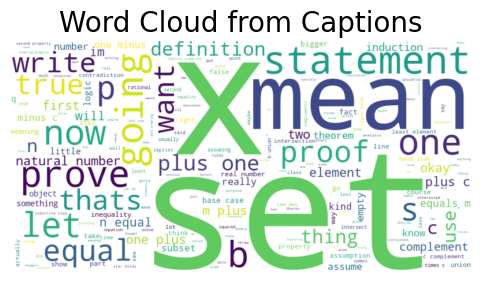

In [26]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = ' '.join(whisper_df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(7, 3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title('Word Cloud from Captions', fontsize=20)
plt.show()

In [41]:
measures=jiwer.compute_measures(manual_text, whisper_text)
measures

{'wer': 0.098927805575411,
 'mer': 0.096837391547719,
 'wil': 0.1377292994230499,
 'wip': 0.8622707005769501,
 'hits': 6454,
 'substitutions': 301,
 'deletions': 240,
 'insertions': 151,
 'ops': [[AlignmentChunk(type='substitute', ref_start_idx=0, ref_end_idx=1, hyp_start_idx=0, hyp_end_idx=1),
   AlignmentChunk(type='delete', ref_start_idx=1, ref_end_idx=3, hyp_start_idx=1, hyp_end_idx=1),
   AlignmentChunk(type='equal', ref_start_idx=3, ref_end_idx=63, hyp_start_idx=1, hyp_end_idx=61),
   AlignmentChunk(type='substitute', ref_start_idx=63, ref_end_idx=64, hyp_start_idx=61, hyp_end_idx=62),
   AlignmentChunk(type='delete', ref_start_idx=64, ref_end_idx=65, hyp_start_idx=62, hyp_end_idx=62),
   AlignmentChunk(type='equal', ref_start_idx=65, ref_end_idx=75, hyp_start_idx=62, hyp_end_idx=72),
   AlignmentChunk(type='insert', ref_start_idx=75, ref_end_idx=75, hyp_start_idx=72, hyp_end_idx=73),
   AlignmentChunk(type='equal', ref_start_idx=75, ref_end_idx=110, hyp_start_idx=73, hyp_end_idx

In [ ]:
import nltk
from nltk.translate.bleu_score import sentence_bleu

# Calculate BLEU score
#bleu_score = sentence_bleu(manual_text, whisper_text)

## Calculate the inserted and deleted words

In [45]:
import jiwer
import difflib

def analyze_insertions_deletions(reference, hypothesis):
    # Split the reference and hypothesis into lists of words
    ref_words = reference.split()
    hyp_words = hypothesis.split()

    # Use difflib to get the differences
    matcher = difflib.SequenceMatcher(None, ref_words, hyp_words)

    deleted_words = []
    added_words = []

    # Iterate through the matching blocks
    for tag, i1, i2, j1, j2 in matcher.get_opcodes():
        if tag == 'delete':
            deleted_words.extend(ref_words[i1:i2])  # Collect deleted words
        elif tag == 'insert':
            added_words.extend(hyp_words[j1:j2])  # Collect added words

    return deleted_words, added_words


In [48]:
# Analyze insertions and deletions
deleted, added = analyze_insertions_deletions(manual_text, whisper_text)

# Print the lists of deleted and added words
print("\nDetailed Error Lists:")
print(f"Deleted Words: {deleted}/n")
print(f"Added Words: {added}")


Detailed Error Lists:
Deleted Words: ['or', 'the', 'second', 'purpose', 'the', 'a', 'a', 'a', 'of', 'if', 'all', 'right', 'that', 'them', 'ok', 'ok', 'the', 'ok', 'ok', 'ok', 'if', 'i', 'take', 'their', 'intersection', 'and', 'take', 'the', 'complement', 'this', 'is', 'the', 'union', 'of', 'the', 'complements', 'so', 'the', 'complement', 'of', 'the', 'intersection', 'is', 'the', 'union', 'of', 'the', 'complements', 'am', 'ok', 'a', 'ok', 'ok', 'and', 'let', 'its', 'ok', 'and', 'ok', 'ok', 'but', 'well', 'remove', 'that', 'ok', 'a', 'when', 'a', 'cob', 'induction', 'ok', 'so', 'are', 'and', 'ok', 'ok', 'you', 'ok', 'ok', 'our', 'by', 'ok', 'all', 'right', 'the', 'ok', 'ok', 'a', 'ok', 'so', 'ok', 'the', 'ok', 'ok', 'ok', 'ok', 'ok', 'all', 'right', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'a', 'ok', 'ok', 'all', 'right', 'ok', 'ok', 'we', 'the', 'to', 'the', 'is', 'all', 'right', 'a', 'will', 'so', 'this', 'is', 'just', 'right', 'here', 'im', 'not', 'doing', 'anything', 'different', '

##  Creating a Dataframe with all the videos 

In [110]:
import os
import pandas as pd

def extract_text_from_vtt(file_path):
    """Extract text from a single VTT file."""
    text_lines = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            if line.strip() and not line.startswith("WEBVTT") and not line[0].isdigit():
                text_lines.append(line.strip())
    return " ".join(text_lines)  

def read_vtt_files_in_folder(folder_path):
    """Read all VTT files in the specified folder and return a DataFrame of their text."""
    data = []  
    for filename in os.listdir(folder_path):  
        if filename.endswith('.vtt'):  
            file_path = os.path.join(folder_path, filename)  
            try:
                text_content = extract_text_from_vtt(file_path)  
                data.append({"filename": filename, "text": text_content})  
            except Exception as e:
                print(f"Error reading {filename}: {e}")  
    
    df = pd.DataFrame(data)
    return df


In [111]:
folder_path = 'whisper_sub'
whisper_df_25 = read_vtt_files_in_folder(folder_path)
whisper_df_25['text'] = whisper_df_25['text'].str.replace('\n', ' ', regex=False)
whisper_df_25['text'] = whisper_df_25['text'].str.replace(r'\[.*?\]|\(.*?\)', '', regex=True)
whisper_df_25['text'] = whisper_df_25['text'].str.translate(str.maketrans('', '', string.punctuation))
whisper_df_25['text'] = whisper_df_25['text'].str.lower()

In [113]:
def extract_lecture_name_2(filename):
    return filename.split('.')[0]  

whisper_df_25['filename'] = whisper_df_25['filename'].apply(lambda x: extract_lecture_name(x.split('.')[0]))
whisper_df_25.rename(columns={'text': 'whisper_text'}, inplace=True)
whisper_df_25

,filename,whisper_text
0,Lecture10TheCompletenessoftheRealNumbersandBas...,okay so lets continue our study of sequences o...
1,Lecture11AbsoluteConvergenceandtheComparisonTe...,so last time we proved the following theorem t...
2,Lecture12TheRatioRootandAlternatingSeriesTests,so lets continue our discussion of series so l...
3,Lecture13LimitsofFunctions,so all right so lets start talking about some ...
4,Lecture14LimitsofFunctionsinTermsofSequencesan...,last lecture we introduced the notion of the l...
5,Lecture15TheContinuityofSineandCosineandtheMan...,so lets continue our discussion of continuity ...
6,Lecture16TheMinMaxTheoremandBolzanosIntermedia...,okay so lets continue with our discussion abou...
7,Lecture17UniformContinuityandtheDefinitionofth...,so last time we finished by proving bosanos in...
8,Lecture18WeierstrasssExampleofaContinuousandNo...,okay so were going to continue with our discus...
9,Lecture19DifferentiationRulesRollesTheoremandt...,so lets continue with our discussion of the de...


In [78]:
folder_path = 'manual_sub'
manual_df_25 = read_vtt_files_in_folder(folder_path)
manual_df_25['text'] = manual_df_25['text'].str.replace('\n', ' ', regex=False)
manual_df_25['text'] = manual_df_25['text'].str.replace(r'\[.*?\]|\(.*?\)', '', regex=True)
manual_df_25['text'] = manual_df_25['text'].str.translate(str.maketrans('', '', string.punctuation))
manual_df_25['text'] = manual_df_25['text'].str.lower()
manual_df_25['text'] = manual_df_25['text'].str.replace('kind captions language en', '', regex=False).str.strip()


In [114]:
def extract_lecture_name_2(filename):
    return filename.split('_')[0]  # Get the part before the first underscore

# Apply the function to the 'filename' column and create a new 'lecture_name' column
manual_df_25['filename'] = manual_df_25['filename'].apply(lambda x: extract_lecture_name(x.split('.')[0]))
manual_df_25.rename(columns={'text': 'manual_text'}, inplace=True)
manual_df_25

,filename,manual_text
0,Lecture10TheCompletenessoftheRealNumbersandBas...,casey rodriguez ok so lets continue our study ...
1,Lecture11AbsoluteConvergenceandtheComparisonTe...,casey rodriguez all right so last time we prov...
2,Lecture12TheRatioRootandAlternatingSeriesTests,casey rodriguez so lets continue our discussio...
3,Lecture13LimitsofFunctions,casey rodriguez so all right so lets start tal...
4,Lecture14LimitsofFunctionsinTermsofSequencesan...,casey rodriguez last lecture we introduced the...
5,Lecture15TheContinuityofSineandCosineandtheMan...,casey rodriguez ok so lets continue our discus...
6,Lecture16TheMinMaxTheoremandBolzanosIntermedia...,casey rodriguez ok so lets continue with our d...
7,Lecture17UniformContinuityandtheDefinitionofth...,casey rodriguez so last time we finished by pr...
8,Lecture18WeierstrasssExampleofaContinuousandNo...,casey rodriquez so were going to continue with...
9,Lecture19DifferentiationRulesRollesTheoremandt...,casey rodriguez so lets continue with our disc...


In [115]:
mergeddf=pd.merge(manual_df_25,whisper_df_25, on='filename')

In [116]:
def calculate_wer(reference, hypothesis):
    wer = jiwer.wer(reference, hypothesis)  # Calculate WER
    return wer
def calculate_mer(reference, hypothesis):
    mer = jiwer.mer(reference, hypothesis)  # Calculate MER
    return mer

In [119]:
mergeddf['WER'] = mergeddf.apply(lambda row: calculate_wer(row['manual_text'], row['whisper_text']), axis=1)
mergeddf['MER'] = mergeddf.apply(lambda row: calculate_mer(row['manual_text'], row['whisper_text']), axis=1)

In [120]:
mergeddf

,filename,manual_text,whisper_text,WER,MER
0,Lecture10TheCompletenessoftheRealNumbersandBas...,casey rodriguez ok so lets continue our study ...,okay so lets continue our study of sequences o...,0.124702,0.118363
1,Lecture11AbsoluteConvergenceandtheComparisonTe...,casey rodriguez all right so last time we prov...,so last time we proved the following theorem t...,0.147115,0.138343
2,Lecture12TheRatioRootandAlternatingSeriesTests,casey rodriguez so lets continue our discussio...,so lets continue our discussion of series so l...,0.135978,0.130166
3,Lecture13LimitsofFunctions,casey rodriguez so all right so lets start tal...,so all right so lets start talking about some ...,0.141940,0.133704
4,Lecture14LimitsofFunctionsinTermsofSequencesan...,casey rodriguez last lecture we introduced the...,last lecture we introduced the notion of the l...,0.113739,0.108359
5,Lecture15TheContinuityofSineandCosineandtheMan...,casey rodriguez ok so lets continue our discus...,so lets continue our discussion of continuity ...,0.096988,0.093828
6,Lecture16TheMinMaxTheoremandBolzanosIntermedia...,casey rodriguez ok so lets continue with our d...,okay so lets continue with our discussion abou...,0.103225,0.099634
7,Lecture17UniformContinuityandtheDefinitionofth...,casey rodriguez so last time we finished by pr...,so last time we finished by proving bosanos in...,0.147365,0.134142
8,Lecture18WeierstrasssExampleofaContinuousandNo...,casey rodriquez so were going to continue with...,okay so were going to continue with our discus...,0.129492,0.123149
9,Lecture19DifferentiationRulesRollesTheoremandt...,casey rodriguez so lets continue with our disc...,so lets continue with our discussion of the de...,0.110187,0.105744


In [121]:
np.mean(mergeddf['WER'])

0.12103650171344471

In [122]:
np.mean(mergeddf['MER'])

0.1146182729505205